In [236]:
# 정리
# MZ 세대는 체크카드만 보유한 인원 비율이 MZ 아닌 세대보다 다소 높다.
# 보통 소득이 없는 젊을 때 체크카드를 만든 후에 나중에 신용카드를 만든다고
# 본다면, MZ 세대는 신용카드의 잠재적 고객으로 추론할 수 있다.
# -> 회귀분석 등으로 MZ 세대 중 잠재적인 신용카드 고객을 추려볼 수 있지 않을까?

# KB 데이터에서는 MZ 세대의 매출건수가 MZ 아닌 세대보다 월등히(2배) 높다.
# KB 데이터에서는 MZ 세대의 회원수가 MZ 아닌 세대보다 월등히(2배) 높다.
# -> 매출건수와 회원수로 무엇을 할 수 있을까..

# 세대별, 남녀별 음식 선호도는 별 차이 없음.
# 국/탕/백반류 -> 해산물 -> 돼지고기 -> 면요리 순으로 선호도 높음.
# 여자의 경우 남자보다 양식 선호도가 높다.

# 의사결정트리에서 표준화/정규화 할 필요 없다.
# 특징 찾을 때, 상관계수(heatmap), 트리모델(feature_importances_)
# 을 이용하여 관련 컬럼을 찾은 후 파생변수 생성, insight 도출에 활용.
# 트리모델 사용할 때, max_depth 를 작게주고, class feature 를 str 리스트로.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [46]:
kb = kb = pd.read_csv('c:\\data\\fin\\KB국민카드_금융빅데이터경진대회_데이터_raw2.csv')
kb

,기준년도,기준년월,한글시도명,한글시군구명,법정동리명,마케팅업종중분류명,마케팅업종세분류명,마케팅업종세세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
0,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,01.남성,1.20대이하,0,1,112,125,3
1,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,01.남성,1.20대이하,1,0,9,9,3
2,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,01.남성,1.20대이하,1,1,49,56,3
3,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,01.남성,2.30대,0,1,30,32,3
4,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,01.남성,2.30대,1,0,27,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311620,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,4.50대,1,0,17,22,5
311621,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,4.50대,1,1,42,49,5
311622,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,5.60대,0,1,3,3,5
311623,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,5.60대,1,0,17,20,5


In [3]:
kb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311625 entries, 0 to 311624
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년도        311625 non-null  int64 
 1   기준년월        311625 non-null  int64 
 2   한글시도명       311625 non-null  object
 3   한글시군구명      311625 non-null  object
 4   법정동리명       311625 non-null  object
 5   마케팅업종중분류명   311625 non-null  object
 6   마케팅업종세분류명   311625 non-null  object
 7   마케팅업종세세분류명  311625 non-null  object
 8   성별구분        311625 non-null  object
 9   연령대         311625 non-null  object
 10  신용카드보유여부    311625 non-null  int64 
 11  체크카드보유여부    311625 non-null  int64 
 12  회원수         311625 non-null  int64 
 13  매출건수        311625 non-null  int64 
 14  순위          311625 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 35.7+ MB


In [4]:
kb.isnull().sum()

기준년도          0
기준년월          0
한글시도명         0
한글시군구명        0
법정동리명         0
마케팅업종중분류명     0
마케팅업종세분류명     0
마케팅업종세세분류명    0
성별구분          0
연령대           0
신용카드보유여부      0
체크카드보유여부      0
회원수           0
매출건수          0
순위            0
dtype: int64

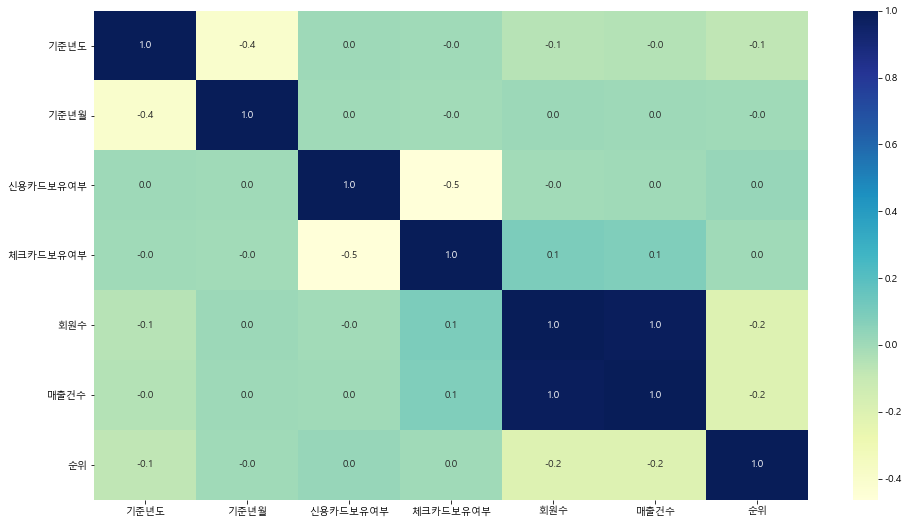

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(kb.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [6]:
kb[kb.columns[kb.dtypes.map(lambda x:x=='object')]].describe().transpose()

,count,unique,top,freq
한글시도명,311625,2,서울특별시,231112
한글시군구명,311625,3,강남구,142295
법정동리명,311625,29,역삼동,33617
마케팅업종중분류명,311625,3,한식,237227
마케팅업종세분류명,311625,9,국/탕/백반류,85649
마케팅업종세세분류명,311625,61,일반한식/백반,21678
성별구분,311625,2,01.남성,160896
연령대,311625,5,2.30대,68137


In [7]:
# object 인코딩 대상
# 한글시도명
# 한글시군구명
# 마케팅업종중분류명
# 마케팅업종세분류명
# 성별구분
# 연령대(필수)

In [8]:
kb_e = kb.copy()

In [9]:
kb_e['성별구분'].unique()

array(['01.남성', '02.여성'], dtype=object)

In [10]:
kb_e['성별구분'].replace({'02.여성':0, '01.남성':1}, inplace=True)

In [11]:
kb_e['연령대'].unique()

array(['1.20대이하', '2.30대', '3.40대', '4.50대', '5.60대'], dtype=object)

In [12]:
kb_e['연령대'] = kb_e['연령대'].map(lambda x: 1 if x in ['1.20대이하', '2.30대'] else 0)

In [13]:
kb_e['한글시도명'].unique()

array(['경기도', '서울특별시'], dtype=object)

In [14]:
kb_e['한글시도명'].replace({'서울특별시':0, '경기도':1}, inplace=True)

In [15]:
kb_e['한글시군구명'].unique()

array(['성남시 분당구', '강남구', '마포구'], dtype=object)

In [16]:
kb_e['한글시군구명'].replace({'마포구':0, '강남구':0.3, '성남시 분당구':1}, inplace=True)

In [17]:
kb_e['마케팅업종중분류명'].unique()

array(['양식', '일식', '한식'], dtype=object)

In [18]:
kb_e['마케팅업종세분류명'].unique()

array(['종합양식', '해산물', '국/탕/백반류', '닭고기', '돼지고기', '면요리', '소고기', '기타고기',
       '밥요리'], dtype=object)

In [21]:
kb_e['마케팅업종중분류명'].replace({'양식':0, '일식':1, '한식':2}, inplace=True)

In [22]:
kb_e['마케팅업종세분류명'].replace({'종합양식':0, '해산물':1, '밥요리':1.3, '국/탕/백반류':2, '닭고기':2.2, '소고기':2.4, '돼지고기':2.6, '면요리':2.7, '기타고기':2.9}, inplace=True)

In [23]:
kb_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311625 entries, 0 to 311624
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기준년도        311625 non-null  int64  
 1   기준년월        311625 non-null  int64  
 2   한글시도명       311625 non-null  int64  
 3   한글시군구명      311625 non-null  float64
 4   법정동리명       311625 non-null  object 
 5   마케팅업종중분류명   311625 non-null  int64  
 6   마케팅업종세분류명   311625 non-null  float64
 7   마케팅업종세세분류명  311625 non-null  object 
 8   성별구분        311625 non-null  int64  
 9   연령대         311625 non-null  int64  
 10  신용카드보유여부    311625 non-null  int64  
 11  체크카드보유여부    311625 non-null  int64  
 12  회원수         311625 non-null  int64  
 13  매출건수        311625 non-null  int64  
 14  순위          311625 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 35.7+ MB


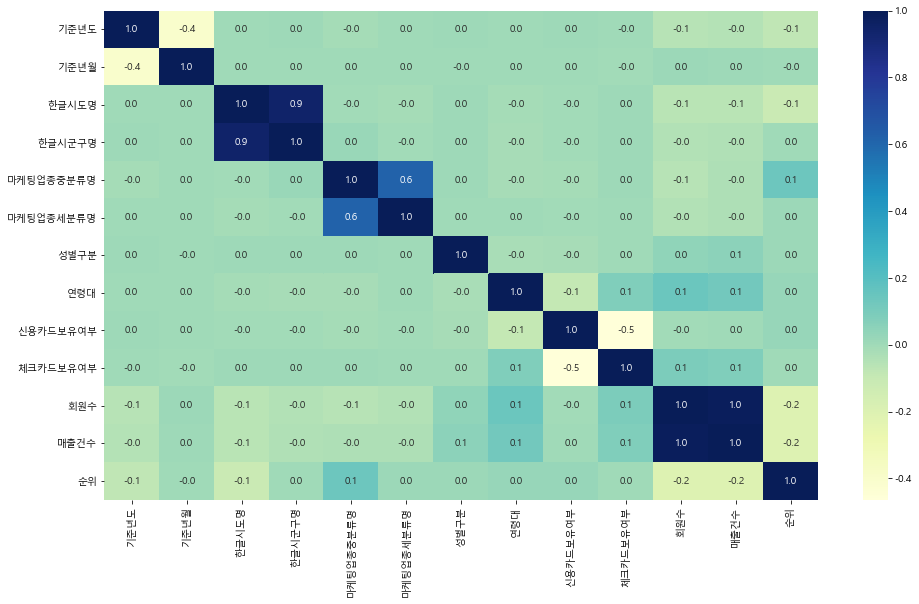

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(kb_e.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

--------------- 성별 비율 -----------------
01.남성   0.51631
02.여성   0.48369
Name: 성별구분, dtype: float64
------------------------------------------


<AxesSubplot:xlabel='성별구분', ylabel='count'>

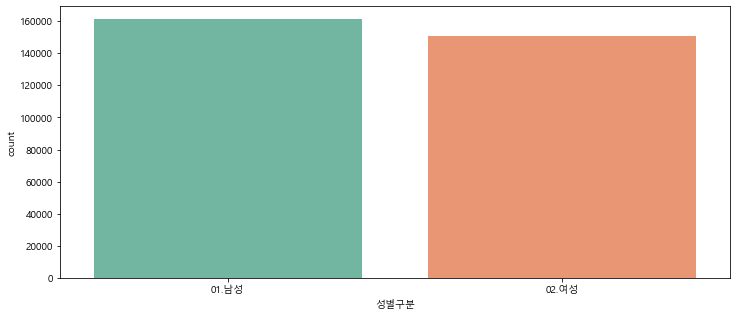

In [26]:
print('--------------- 성별 비율 -----------------')
print(kb['성별구분'].value_counts() / kb.shape[0])
print('------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(kb['성별구분'], palette='Set2')
#plt.xticks([0,1], ['Female', 'Male'])

--------------- MZ세대 성별 비율 -----------------
1   0.50491
0   0.49509
Name: 성별구분, dtype: float64
-------------------------------------------------


([<matplotlib.axis.XTick at 0x2b39ef2daf0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

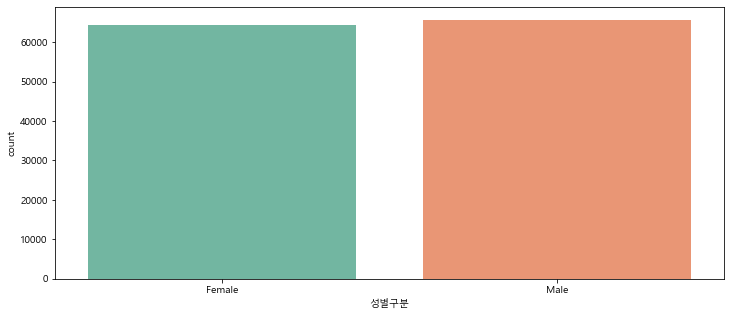

In [28]:
print('--------------- MZ세대 성별 비율 -----------------')
print(kb_e['성별구분'][kb_e['연령대'] == 1].value_counts() / kb_e['성별구분'][kb_e['연령대'] == 1].shape[0])
print('-------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(kb_e['성별구분'][kb_e['연령대'] == 1], palette='Set2')
plt.xticks([0,1], ['Female', 'Male'])

------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------
0   0.58282
1   0.41718
Name: 연령대, dtype: float64
-----------------------------------------------------------


([<matplotlib.axis.XTick at 0x2b399c46700>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

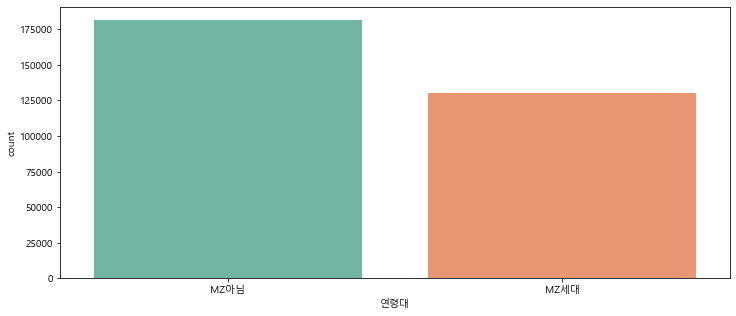

In [30]:
print('------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------')
print(kb_e['연령대'].value_counts() / kb_e.shape[0])
print('-----------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(kb_e['연령대'], palette='Set2')
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [32]:
grouped = kb_e.groupby(['연령대']).mean()
grouped.reset_index(inplace=True)
grouped

,연령대,기준년도,기준년월,한글시도명,한글시군구명,마케팅업종중분류명,마케팅업종세분류명,성별구분,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
0,0,2019.65295,6.36026,0.26240,0.39980,1.69543,1.86080,0.52448,0.73418,0.63449,34.54043,44.84902,11.03574
1,1,2019.65811,6.37498,0.25272,0.38914,1.67766,1.86571,0.50491,0.64866,0.71292,71.33122,87.16776,11.45669


--------------- 세대 별 평균 매출건수 -----------------
      매출건수
0 44.84902
1 87.16776
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x2b399069a90>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

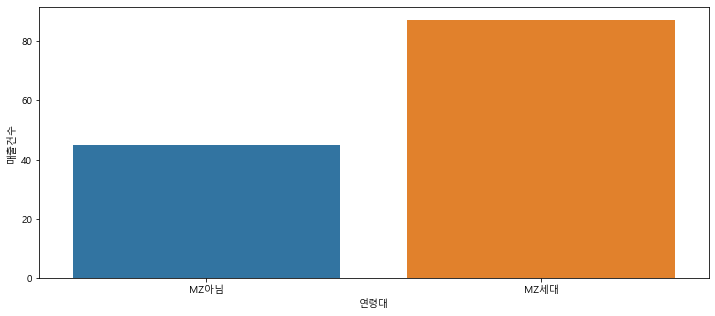

In [33]:
print('--------------- 세대 별 평균 매출건수 -----------------')
print(grouped[['매출건수']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='연령대', y='매출건수', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [34]:
# KB 데이터에서는 MZ 세대의 매출건수가 MZ 아닌 세대보다 월등히(2배) 높다.

--------------- 세대 별 평균 회원수 -----------------
       회원수
0 34.54043
1 71.33122
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x2b399103910>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

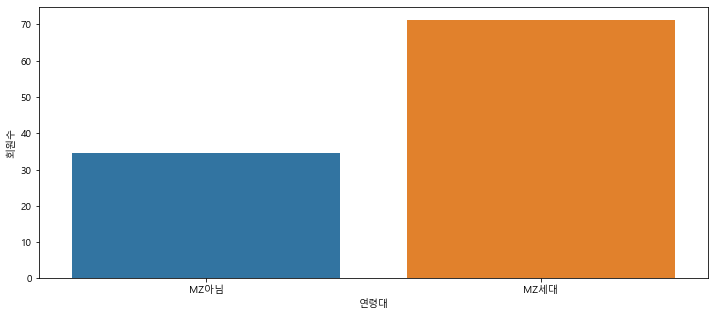

In [35]:
print('--------------- 세대 별 평균 회원수 -----------------')
print(grouped[['회원수']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='연령대', y='회원수', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [36]:
# KB 데이터에서는 MZ 세대의 회원수가 MZ 아닌 세대보다 월등히(2배) 높다.

--------------- 세대 별 평균 신용카드 보유여부 -----------------
   신용카드보유여부
0   0.73418
1   0.64866
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x2b399033b80>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

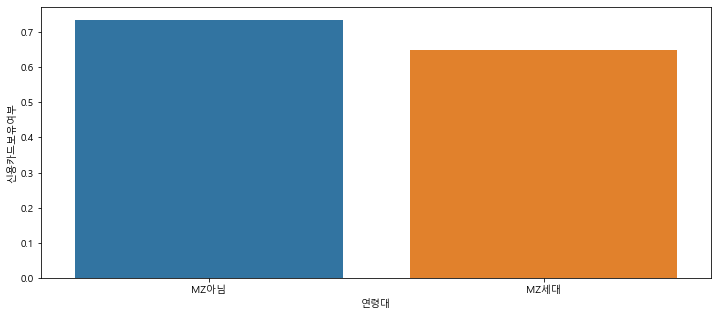

In [37]:
print('--------------- 세대 별 평균 신용카드 보유여부 -----------------')
print(grouped[['신용카드보유여부']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='연령대', y='신용카드보유여부', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

--------------- 세대 별 평균 체크카드 보유여부 -----------------
   체크카드보유여부
0   0.63449
1   0.71292
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x2b399002280>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

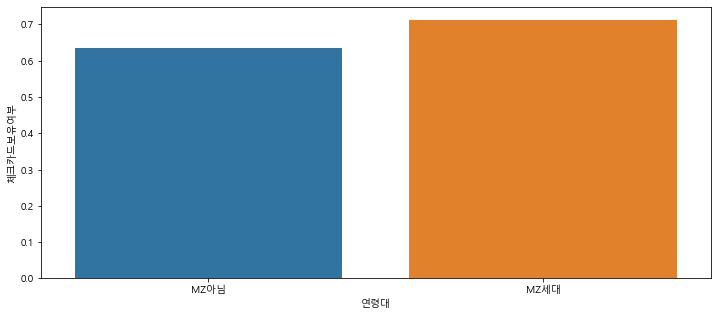

In [38]:
print('--------------- 세대 별 평균 체크카드 보유여부 -----------------')
print(grouped[['체크카드보유여부']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='연령대', y='체크카드보유여부', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [39]:
# 신용카드는 MZ 세대가, 체크카드는 MZ 아닌 세대가 보유여부가 좀 더 많았으나
# 유의미한 차이는 나타나지 않았다.
# 약간 억지 추론을 해보면, 기성세대는 체크카드 만든 후 신용카드 만들었다면,
# 혹시 MZ 세대는 첫 카드를 바로 신용카드로 만드는 것 아닐까?

In [74]:
kb2 = kb.copy()
kb2['연령대'] = kb2['연령대'].map(lambda x: 1 if x in ['1.20대이하', '2.30대'] else 0)
kb2['성별구분'].replace({'02.여성':0, '01.남성':1}, inplace=True)
kb2.head()

,기준년도,기준년월,한글시도명,한글시군구명,법정동리명,마케팅업종중분류명,마케팅업종세분류명,마케팅업종세세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
0,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,1,1,0,1,112,125,3
1,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,1,1,1,0,9,9,3
2,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,1,1,1,1,49,56,3
3,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,1,1,0,1,30,32,3
4,2019,3,경기도,성남시 분당구,구미동,양식,종합양식,종합양식,1,1,1,0,27,31,3


In [69]:
print('--------------- MZ 세대 -----------------')
print('체크카드만 보유한 인원 비율', kb2[(kb2['연령대']==1) & (kb2['체크카드보유여부']==1) & (kb2['신용카드보유여부']==0)].shape[0] / kb2[kb2['연령대']==1].shape[0])
print('신용카드만 보유한 인원 비율', kb2[(kb2['연령대']==1) & (kb2['체크카드보유여부']==0) & (kb2['신용카드보유여부']==1)].shape[0] / kb2[kb2['연령대']==1].shape[0])
print('체크카드 있고 신용카드도 보유한 인원 비율', kb2[(kb2['연령대']==1) & (kb2['체크카드보유여부']==1) & (kb2['신용카드보유여부']==1)].shape[0] / kb2[kb2['연령대']==1].shape[0])

print('\n')

print('--------------- MZ 아님 -----------------')
print('체크카드만 보유한 인원 비율', kb2[(kb2['연령대']==0) & (kb2['체크카드보유여부']==1) & (kb2['신용카드보유여부']==0)].shape[0] / kb2[kb2['연령대']==0].shape[0])
print('신용카드만 보유한 인원 비율', kb2[(kb2['연령대']==0) & (kb2['체크카드보유여부']==0) & (kb2['신용카드보유여부']==1)].shape[0] / kb2[kb2['연령대']==0].shape[0])
print('체크카드 있고 신용카드도 보유한 인원 비율', kb2[(kb2['연령대']==0) & (kb2['체크카드보유여부']==1) & (kb2['신용카드보유여부']==1)].shape[0] / kb2[kb2['연령대']==0].shape[0])


--------------- MZ 세대 -----------------
체크카드만 보유한 인원 비율 0.3513430355989047
신용카드만 보유한 인원 비율 0.287075782283622
체크카드 있고 신용카드도 보유한 인원 비율 0.3615811821174733


--------------- MZ 아님 -----------------
체크카드만 보유한 인원 비율 0.2658172788389008
신용카드만 보유한 인원 비율 0.3655083938531337
체크카드 있고 신용카드도 보유한 인원 비율 0.3686743273079655


In [70]:
# MZ 세대는 체크카드만 보유한 인원 비율이 MZ 아닌 세대보다 다소 높다.
# 보통 소득이 없는 젊을 때 체크카드를 만든 후에 나중에 신용카드를 만든다고
# 본다면, MZ 세대는 신용카드의 잠재적 고객으로 추론할 수 있다.

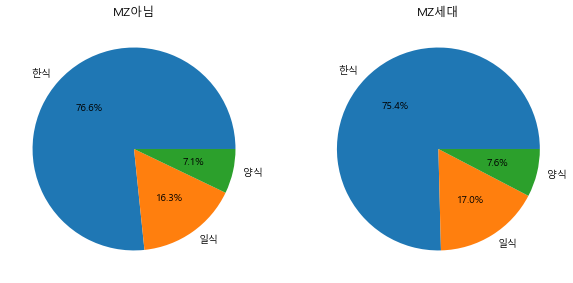

In [71]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(kb2['마케팅업종중분류명'][kb2['연령대']==0].value_counts(), labels=kb2.마케팅업종중분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(kb2['마케팅업종중분류명'][kb2['연령대']==1].value_counts(), labels=kb2.마케팅업종중분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ아님')
ax2.set_title('MZ세대')

plt.show()

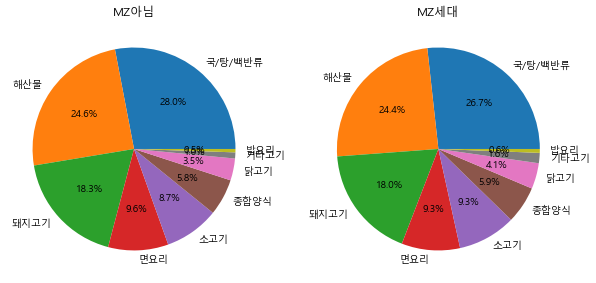

In [72]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(kb2['마케팅업종세분류명'][kb2['연령대']==0].value_counts(), labels=kb2.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(kb2['마케팅업종세분류명'][kb2['연령대']==1].value_counts(), labels=kb2.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ아님')
ax2.set_title('MZ세대')

plt.show()

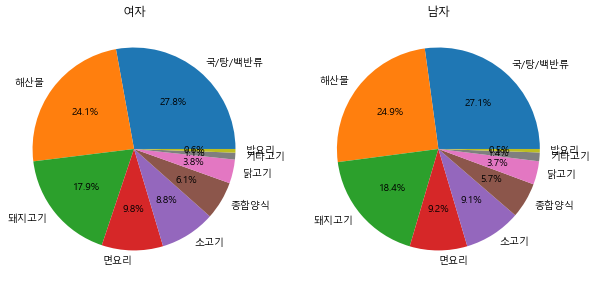

In [75]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(kb2['마케팅업종세분류명'][kb2['성별구분']==0].value_counts(), labels=kb2.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(kb2['마케팅업종세분류명'][kb2['성별구분']==1].value_counts(), labels=kb2.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('여자')
ax2.set_title('남자')

plt.show()

In [76]:
# 세대별, 남녀별 음식 선호도는 별 차이 없음.
# 국/탕/백반류 -> 해산물 -> 돼지고기 -> 면요리 순으로 선호도 높음.

In [78]:
kb2_age_grouped = kb2.groupby('연령대')
a = pd.DataFrame(kb2_age_grouped['한글시도명'].value_counts())
a.columns = ['count']
a.reset_index(inplace=True)
a

,연령대,한글시도명,count
0,0,서울특별시,133963
1,0,경기도,47658
2,1,서울특별시,97149
3,1,경기도,32855


([<matplotlib.axis.XTick at 0x2b3998a19a0>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

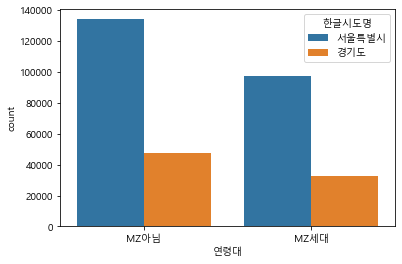

In [80]:
sns.barplot(x='연령대', y='count', hue='한글시도명', data=a)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [94]:
b = pd.DataFrame(kb2_age_grouped['한글시군구명'].value_counts())
b.columns = ['count']
b.reset_index(inplace=True)
b

,연령대,한글시군구명,count
0,0,강남구,83181
1,0,마포구,50782
2,0,성남시 분당구,47658
3,1,강남구,59114
4,1,마포구,38035
5,1,성남시 분당구,32855


In [132]:
b2 = b.groupby(['연령대']).sum()
b2

,count
연령대,
0,181621
1,130004


In [161]:
b3 = b.groupby(['연령대', '한글시군구명']).mean()
b_age_1 = b3.xs(1, level='연령대')
b_age_1['ratio'] = b_age_1['count'].apply(lambda x:x/130004)
b_age_1['연령대'] = 1
b_age_1.reset_index(inplace=True)
#b_age_1 = b_age_1.set_index('연령대')
b_age_1

,한글시군구명,count,ratio,연령대
0,강남구,59114,0.45471,1
1,마포구,38035,0.29257,1
2,성남시 분당구,32855,0.25272,1


In [162]:
b3 = b.groupby(['연령대', '한글시군구명']).mean()
b_age_0 = b3.xs(0, level='연령대')
b_age_0['ratio'] = b_age_0['count'].apply(lambda x:x/181621)
b_age_0['연령대'] = 0
b_age_0.reset_index(inplace=True)
#b_age_0 = b_age_0.set_index('연령대')
b_age_0

,한글시군구명,count,ratio,연령대
0,강남구,83181,0.45799,0
1,마포구,50782,0.27960,0
2,성남시 분당구,47658,0.26240,0


In [163]:
b4 = pd.concat([b_age_0, b_age_1], axis=0)
b4

,한글시군구명,count,ratio,연령대
0,강남구,83181,0.45799,0
1,마포구,50782,0.27960,0
2,성남시 분당구,47658,0.26240,0
0,강남구,59114,0.45471,1
1,마포구,38035,0.29257,1
2,성남시 분당구,32855,0.25272,1


([<matplotlib.axis.XTick at 0x2b39bc90760>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

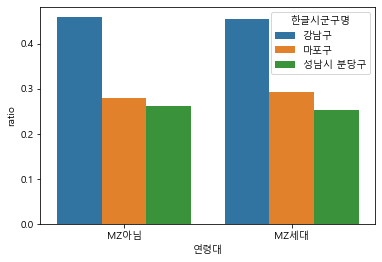

In [164]:
sns.barplot(x='연령대', y='ratio', hue='한글시군구명', data=b4)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [194]:
# 세대별 사는곳(또는 카드 긁은 곳?)의 비율은 강남구, 마포구, 분당구 순으로
# 높으며 세대별로 차이 없음.

In [195]:
kb_e.head()

,기준년도,기준년월,한글시도명,한글시군구명,법정동리명,마케팅업종중분류명,마케팅업종세분류명,마케팅업종세세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
0,2019,3,1,1.00000,구미동,0,0.00000,종합양식,1,1,0,1,112,125,3
1,2019,3,1,1.00000,구미동,0,0.00000,종합양식,1,1,1,0,9,9,3
2,2019,3,1,1.00000,구미동,0,0.00000,종합양식,1,1,1,1,49,56,3
3,2019,3,1,1.00000,구미동,0,0.00000,종합양식,1,1,0,1,30,32,3
4,2019,3,1,1.00000,구미동,0,0.00000,종합양식,1,1,1,0,27,31,3


In [197]:
df = kb_e[['한글시도명', '한글시군구명', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '연령대', '신용카드보유여부', '체크카드보유여부', '회원수', '매출건수', '순위']]
df

,한글시도명,한글시군구명,마케팅업종중분류명,마케팅업종세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
0,1,1.00000,0,0.00000,1,1,0,1,112,125,3
1,1,1.00000,0,0.00000,1,1,1,0,9,9,3
2,1,1.00000,0,0.00000,1,1,1,1,49,56,3
3,1,1.00000,0,0.00000,1,1,0,1,30,32,3
4,1,1.00000,0,0.00000,1,1,1,0,27,31,3
...,...,...,...,...,...,...,...,...,...,...,...
311620,0,0.00000,2,2.70000,0,0,1,0,17,22,5
311621,0,0.00000,2,2.70000,0,0,1,1,42,49,5
311622,0,0.00000,2,2.70000,0,0,0,1,3,3,5
311623,0,0.00000,2,2.70000,0,0,1,0,17,20,5


In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

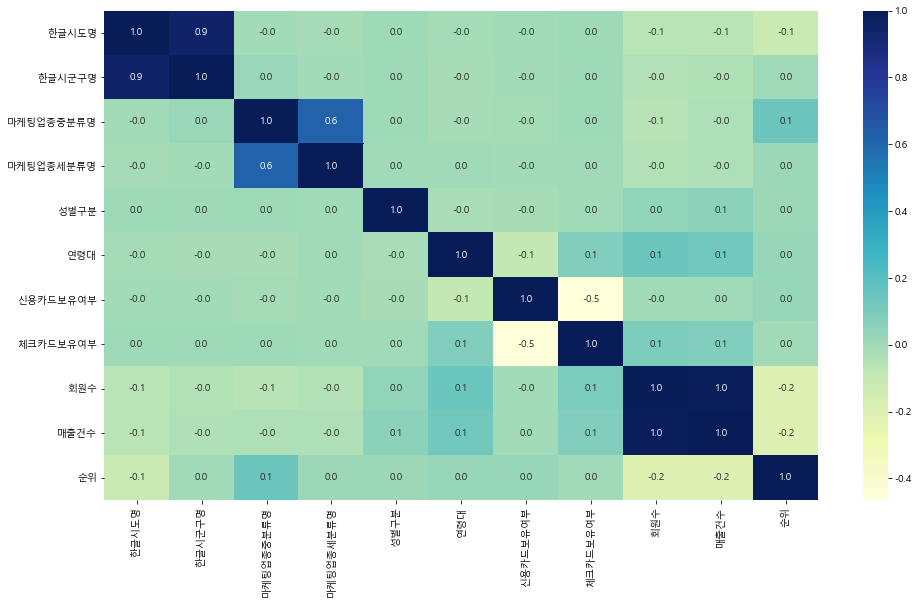

In [199]:
plt.figure(figsize=(16,9))
sns.heatmap(scaled_df.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [200]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [201]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df)
reduced_df.shape

(311625, 2)

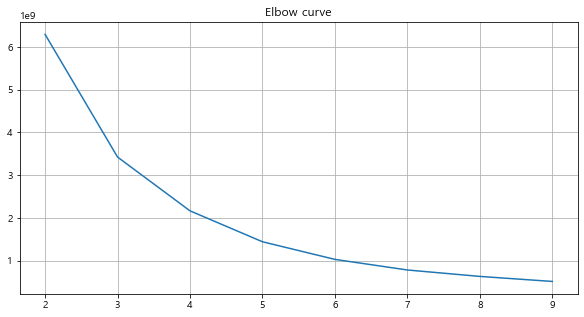

In [202]:
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_df)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [203]:
from sklearn import cluster

kmeans = cluster.KMeans(init='random', n_clusters=10, n_init=10)

kmeans.fit(df)

cluster_label = kmeans.labels_
df['cluster'] = cluster_label

df.head()

,한글시도명,한글시군구명,마케팅업종중분류명,마케팅업종세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위,cluster
0,1,1.00000,0,0.00000,1,1,0,1,112,125,3,7
1,1,1.00000,0,0.00000,1,1,1,0,9,9,3,5
2,1,1.00000,0,0.00000,1,1,1,1,49,56,3,0
3,1,1.00000,0,0.00000,1,1,0,1,30,32,3,5
4,1,1.00000,0,0.00000,1,1,1,0,27,31,3,5


In [204]:
df_kmeans_grouped = df.groupby('연령대')
df_kmeans_grouped['cluster'].value_counts()

연령대  cluster
0    5          127285
     0           36377
     7           11228
     2            4011
     6            1707
     1             668
     9             236
     8              87
     3              22
1    5           73584
     0           30168
     7           13095
     2            6651
     6            3290
     1            1639
     9             879
     8             441
     3             178
     4              79
Name: cluster, dtype: int64

In [205]:
e = pd.DataFrame(df_kmeans_grouped['cluster'].value_counts())
e.columns = ['count']
e.reset_index(inplace=True)
e

,연령대,cluster,count
0,0,5,127285
1,0,0,36377
2,0,7,11228
3,0,2,4011
4,0,6,1707
5,0,1,668
6,0,9,236
7,0,8,87
8,0,3,22
9,1,5,73584


<AxesSubplot:xlabel='연령대', ylabel='count'>

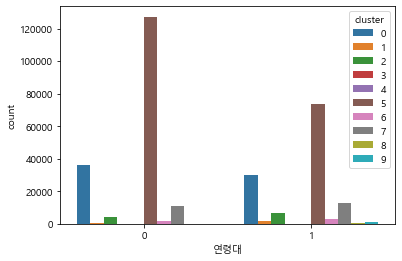

In [206]:
sns.barplot(x='연령대', y='count', hue='cluster', data=e)

In [207]:
# 정답없이 분류하는 k-means 모델을 통해 MZ세대(1) 와 MZ아닌세대(0) 의
# 특징적인 cluster 가 있는지 확인해봤지만, 두 세대간 구별되는 차이 없음.

In [208]:
df = kb_e[['한글시도명', '한글시군구명', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '연령대', '신용카드보유여부', '체크카드보유여부', '회원수', '매출건수', '순위']]
df

,한글시도명,한글시군구명,마케팅업종중분류명,마케팅업종세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
0,1,1.00000,0,0.00000,1,1,0,1,112,125,3
1,1,1.00000,0,0.00000,1,1,1,0,9,9,3
2,1,1.00000,0,0.00000,1,1,1,1,49,56,3
3,1,1.00000,0,0.00000,1,1,0,1,30,32,3
4,1,1.00000,0,0.00000,1,1,1,0,27,31,3
...,...,...,...,...,...,...,...,...,...,...,...
311620,0,0.00000,2,2.70000,0,0,1,0,17,22,5
311621,0,0.00000,2,2.70000,0,0,1,1,42,49,5
311622,0,0.00000,2,2.70000,0,0,0,1,3,3,5
311623,0,0.00000,2,2.70000,0,0,1,0,17,20,5


In [242]:
x = df[['한글시도명', '한글시군구명', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '신용카드보유여부', '체크카드보유여부', '회원수', '매출건수', '순위']]
y = df['연령대']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)


(280462, 10)
(31163, 10)


In [243]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train, y_train)

y_hat = knn.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

[[15684  2407]
 [ 6544  6528]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78     18091
           1       0.73      0.50      0.59     13072

    accuracy                           0.71     31163
   macro avg       0.72      0.68      0.69     31163
weighted avg       0.72      0.71      0.70     31163



In [244]:
knn.feature_importances_

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [211]:
x = df.loc[0:1000, ['한글시도명', '한글시군구명', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '신용카드보유여부', '체크카드보유여부', '회원수', '매출건수', '순위']]
y = df.loc[0:1000, '연령대']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(900, 10)
(101, 10)


In [250]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)

model.fit(x_train, y_train)

pred = model.predict(x_test)

print((pred == y_test).mean())

0.6722074254725154


In [251]:
['한글시도명', '한글시군구명', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '신용카드보유여부', '체크카드보유여부', '회원수', '매출건수', '순위']

['한글시도명',
 '한글시군구명',
 '마케팅업종중분류명',
 '마케팅업종세분류명',
 '성별구분',
 '신용카드보유여부',
 '체크카드보유여부',
 '회원수',
 '매출건수',
 '순위']

In [252]:
model.feature_importances_

array([0.        , 0.0057856 , 0.00467888, 0.        , 0.        ,
       0.30741113, 0.18601292, 0.28380463, 0.01788947, 0.19441737])

In [253]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree_kb.dot',
                class_names=['0','1'],
                feature_names=['한글시도명', '한글시군구명', '마케팅업종중분류명', '마케팅업종세분류명', '성별구분', '신용카드보유여부', '체크카드보유여부', '회원수', '매출건수', '순위'],
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게

In [254]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

In [255]:
import graphviz
with open('tree_kb.dot', 'r', encoding='UTF8') as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename='tree_kb', format='svg') # svg로 저장

'tree_kb.svg'

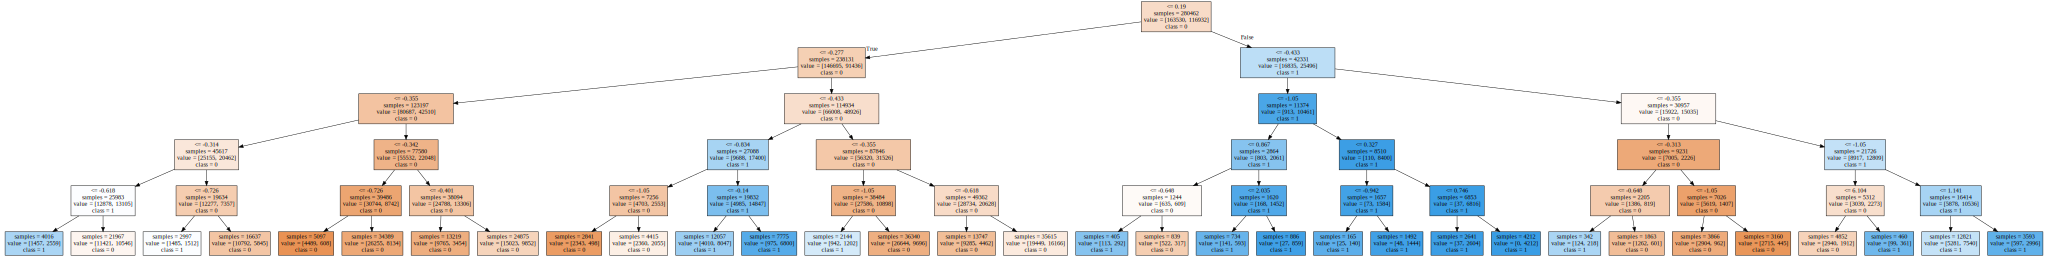

In [256]:
import graphviz

with open('tree_kb.dot', 'rt', encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
# 약 0.73의 정확도로 MZ 세대와 MZ 아닌 세대를 구분하는 인자는 아래와 같다.
# 1. 회원수 <= 2.648
# 2. 신용카드보유여부
# 3. 매출건수